In [1]:
import string
import pandas as pd
import numpy as np

In [2]:
import clean_text_class as clean
import count_words_letters_class as count

## English books

In [3]:
english_books = ["books/alice.txt", "books/peterpan.txt", "books/wizardofoz.txt"]
freq_results = []

In [4]:
for en_book in english_books:
    raw = clean.clean_text(en_book)
    text = raw.remove_metadata(raw.text)
    content = raw.remove_chapters(text)
    content = raw.remove_punctuation(content)
    letters = raw.text_letters(content)
    analysis = count.analyse_letters(letters)
    letters_count = analysis.letters_count(analysis.letters)
    letters_freq = analysis.letters_freq_pd(letters_count)
    freq_results.append(letters_freq)

In [5]:
latin_alphabet = list(string.ascii_lowercase)
letters_freq_en = {key: 0 for key in latin_alphabet}

In [6]:
for key in letters_freq_en:
    mean = np.mean([a.get(key, 0) for a in freq_results])
    letters_freq_en[key] = mean

In [7]:
# letters_freq_en

In [8]:
freq_en = pd.DataFrame(letters_freq_en.items(), columns=["letter", "average frequency"])

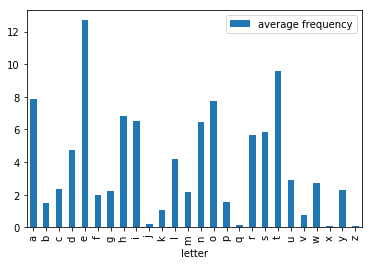

In [9]:
freq_en.plot(kind='bar', x="letter")

## French books

In [10]:
french_books = ["books/tourdumonde.txt", "books/sophie.txt", "books/monmoulin.txt"]
freq_fr_results = []

In [11]:
for fr_book in french_books:
    raw = clean.clean_text(fr_book)
    text = raw.remove_metadata(raw.text)
    content = raw.remove_chapters(text)
    content = raw.remove_punctuation(content)
    letters = raw.text_letters(content)
    analysis = count.analyse_letters(letters)
    letters_count = analysis.letters_count(analysis.letters)
    letters_freq = analysis.letters_freq_pd(letters_count)
    freq_fr_results.append(letters_freq)

In [12]:
latin_alphabet = list(string.ascii_lowercase)
letters_freq_fr = {key: 0 for key in latin_alphabet}

In [13]:
for key in letters_freq_fr:
    mean = np.mean([a.get(key, 0) for a in freq_fr_results])
    letters_freq_fr[key] = mean

In [14]:
# letters_freq_fr

In [15]:
freq_fr = pd.DataFrame(letters_freq_fr.items(), columns=["letter", "average frequency"])

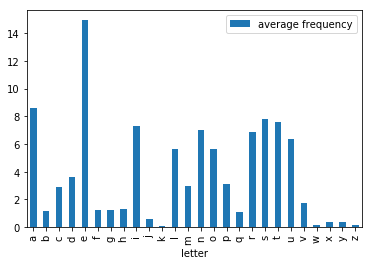

In [16]:
freq_fr.plot(kind='bar', x="letter")

## Comparison

In [36]:
en_vs_en = pd.DataFrame({"freq_en": list(letters_freq_en.values()),
                         "freq_fr": list(letters_freq_fr.values())},
                        index=latin_alphabet)

In [38]:
# en_vs_en

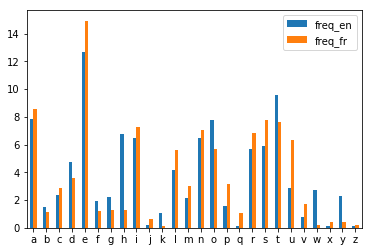

In [39]:
en_vs_en.plot(kind='bar', rot=0)